## Step 1: Import Necessary Libraries and Load the Dataset

In [73]:
# Import necessary libraries
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = "insurance.csv"  # Ensure this is the correct path
df = pd.read_csv(file_path)

# Display the first few rows
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Step 2: Understand the Dataset Structure

In [74]:
def heading(title):
    print(f"{'=' * len(title)}")
    print(f"{title.upper()}")
    print(f"{'=' * len(title)}")

    # def heading(title):
    # print(f"\n{'=' * len(title)}\n{title.upper()}\n{'=' * len(title)}\n")

In [75]:
# number of rows and columns
print("Number of rows are: ", df.shape[0])
print("Number of columns are: ", df.shape[1])

Number of rows are:  1338
Number of columns are:  7


In [76]:
heading('Columns Types')
total_columns = df.columns.tolist()
number_of_columns = len(total_columns)
print("Number of Total Columns are : \n", number_of_columns)
print("Total Columns are : \n", total_columns)

# numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
number_of_numerical_columns = len(numerical_columns.columns)
print("Number of Numerical Columns are : \n", number_of_numerical_columns)
print("Numerical Columns are : \n", numerical_columns.columns)

# categorical columns
categorical_columns = df.select_dtypes(include=['object'])
number_of_categorical_columns = len(categorical_columns.columns)
print("Number of Categorical Columns are : \n", number_of_categorical_columns)
print("Categorical Columns are : \n", categorical_columns.columns)

COLUMNS TYPES
Number of Total Columns are : 
 7
Total Columns are : 
 ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
Number of Numerical Columns are : 
 4
Numerical Columns are : 
 Index(['age', 'bmi', 'children', 'charges'], dtype='object')
Number of Categorical Columns are : 
 3
Categorical Columns are : 
 Index(['sex', 'smoker', 'region'], dtype='object')


In [77]:
# data incpsection
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [78]:
# Get summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### Data looks good as there is count for all the columns is equal to 1338 which is the number of rows. It mean there is no null values.

## Step 3: Exploratory Data Analysis (EDA)

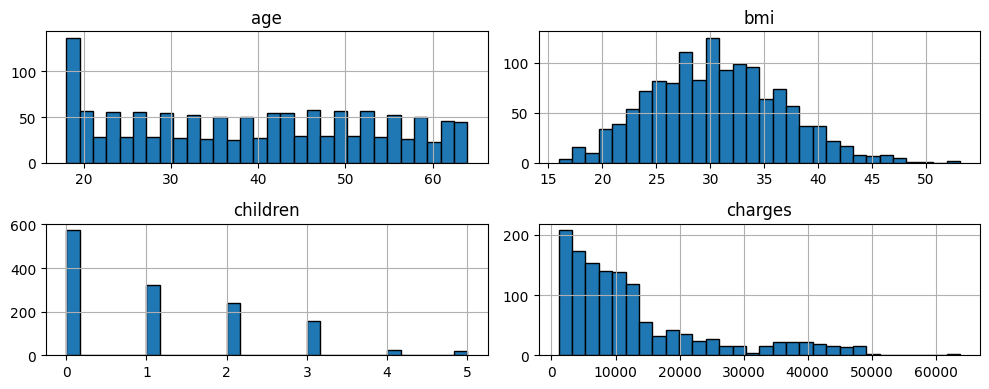

In [79]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df.hist(figsize=(10, 4), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

**Histogram (Distribution of Features)**
**What It Shows:** The distribution of numerical variables like age, bmi, children, and charges.

**Insights:**

`age:` Most policyholders are young adults (20s).

`bmi:` It follows a bell-shaped curve, meaning most values are around the center.

`children:` Most people have 0-2 children.

`charges:` Right-skewed (most people pay lower insurance charges, but some pay very high amounts).

### Encoding Categorical Variables

In [80]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [81]:
# df_encoded = pd.get_dummies(df, drop_first=True)
# drop_first=True avoids redundancy (dummy variable trap).


# encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

print("Before Encoding sex column: ", df['sex'].unique())
df.replace({'sex': {'male': 1, 'female': 0}}, inplace=True)
print("After Encoding sex column: ", df['sex'].unique())

print("Before Encoding smoker column: ", df['smoker'].unique())
df.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)
print("After Encoding smoker column: ", df['smoker'].unique())

print("Before Encoding region column: ", df['region'].unique())
df['region'] = le.fit_transform(df['region'])
print("After Encoding region column: ", df['region'].unique())

Before Encoding sex column:  ['female' 'male']
After Encoding sex column:  [0 1]
Before Encoding smoker column:  ['yes' 'no']
After Encoding smoker column:  [1 0]
Before Encoding region column:  ['southwest' 'southeast' 'northwest' 'northeast']
After Encoding region column:  [3 2 1 0]


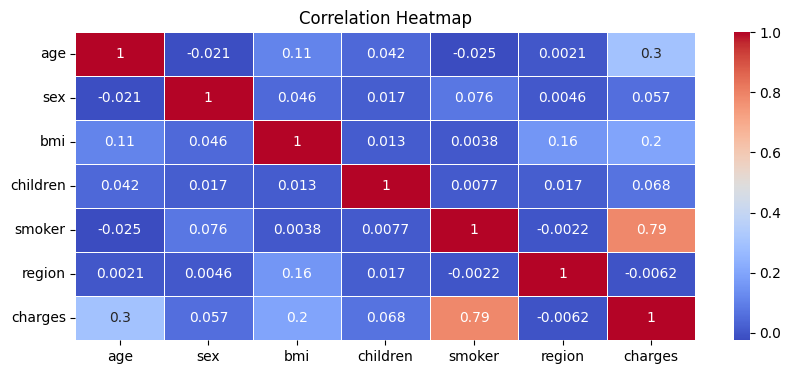

In [84]:
import seaborn as sns
plt.figure(figsize=(10, 4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**Correlation Heatmap**
**What It Shows:** How features relate to each other (correlation ranges from -1 to +1).

**Key Observations:**

`charges` has a strong correlation (0.79) with `smoker_yes` → Smokers tend to pay higher insurance charges.

`age` and `charges` have a moderate positive correlation (0.3) → Older people tend to pay more.

`bmi` and `charges` have a weak positive correlation (0.2) → Higher BMI might slightly increase insurance cost.

`children` doesn’t significantly impact `charges.`

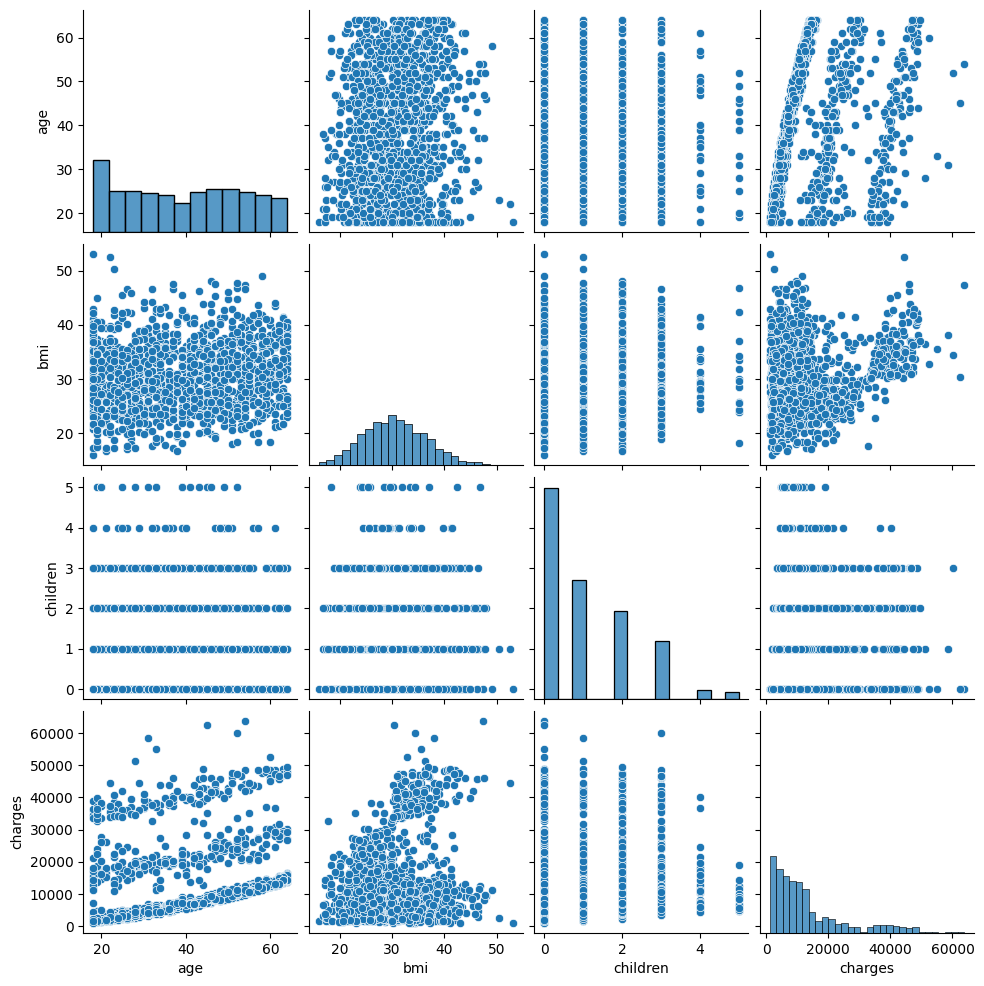

In [86]:
sns.pairplot(numerical_columns)
plt.show()

**Pair Plot**
**What It Shows:** Scatter plots of all numerical features against each other.

**Observations:**

`age vs charges:` A positive trend; older people tend to have higher charges.

     Some high bmi values lead to high charges.

`smoker vs charges: `There are two groups in charges—one with low values and another with very high values. The high-cost group likely represents smokers.

### checking missing values

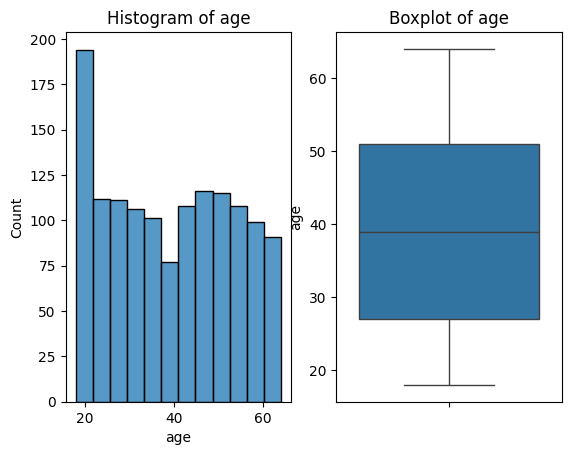

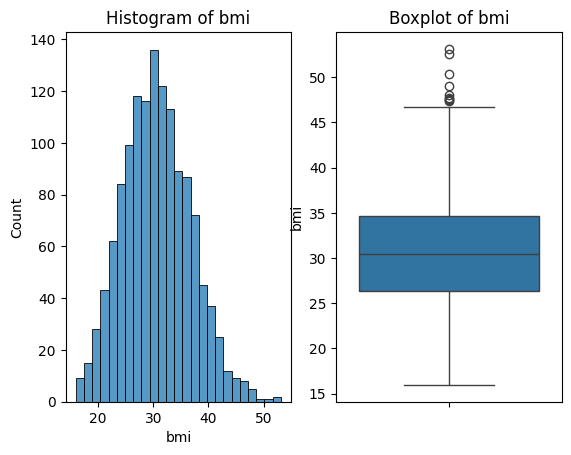

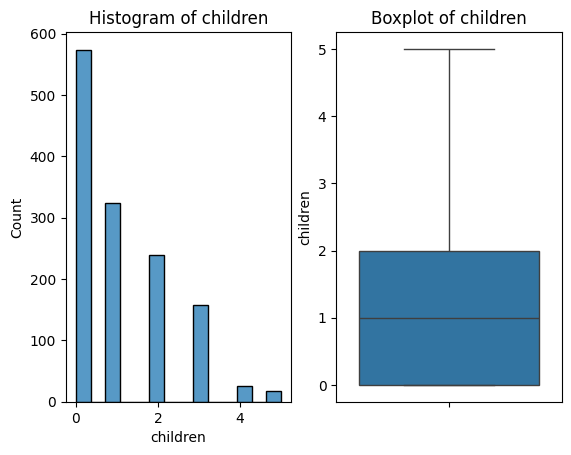

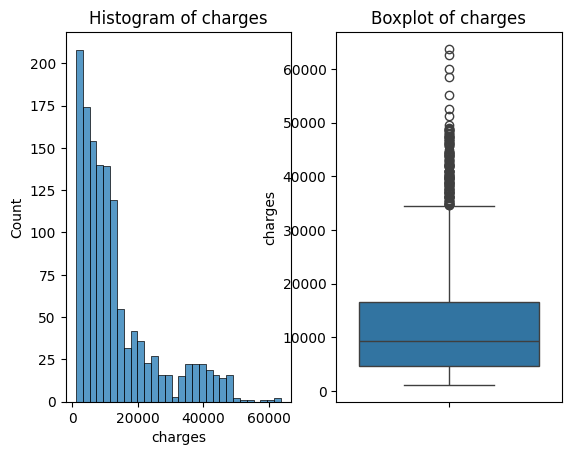

In [87]:
for i in numerical_columns:
    # plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df[i])
    plt.title(f'Histogram of {i}')
    plt.subplot(1, 2, 2)
    sns.boxplot(df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()
    # print(f'\n\n{df[i].describe()}')
    # print(f'\n\n{df[i].skew()}')

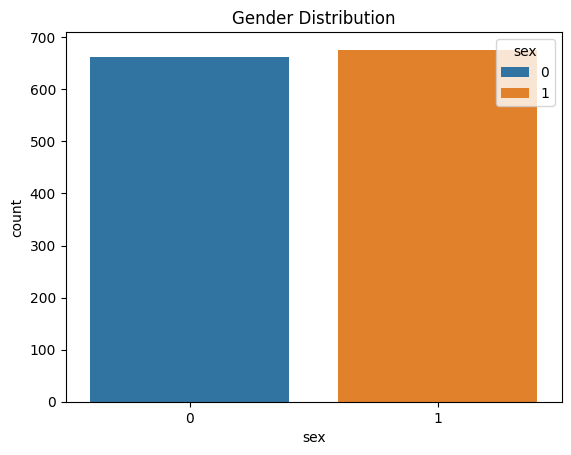

In [94]:
# Gender Column
sns.countplot(x='sex', data=df, hue="sex")
plt.title('Gender Distribution')
plt.show()

In [95]:
# values count for 'sex' column
df['sex'].value_counts()

sex
1    676
0    662
Name: count, dtype: int64

In [88]:
missing_values = df.isnull().sum()
missing_values

# Fill missing values with the median of each column
# df.fillna(df.median(), inplace=True)
# Fill missing values with the mode (most frequent value)
# df.fillna(df.mode().iloc[0], inplace=True)
# print("Missing Values after filling:\n", df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Figure size 1000x600 with 0 Axes>

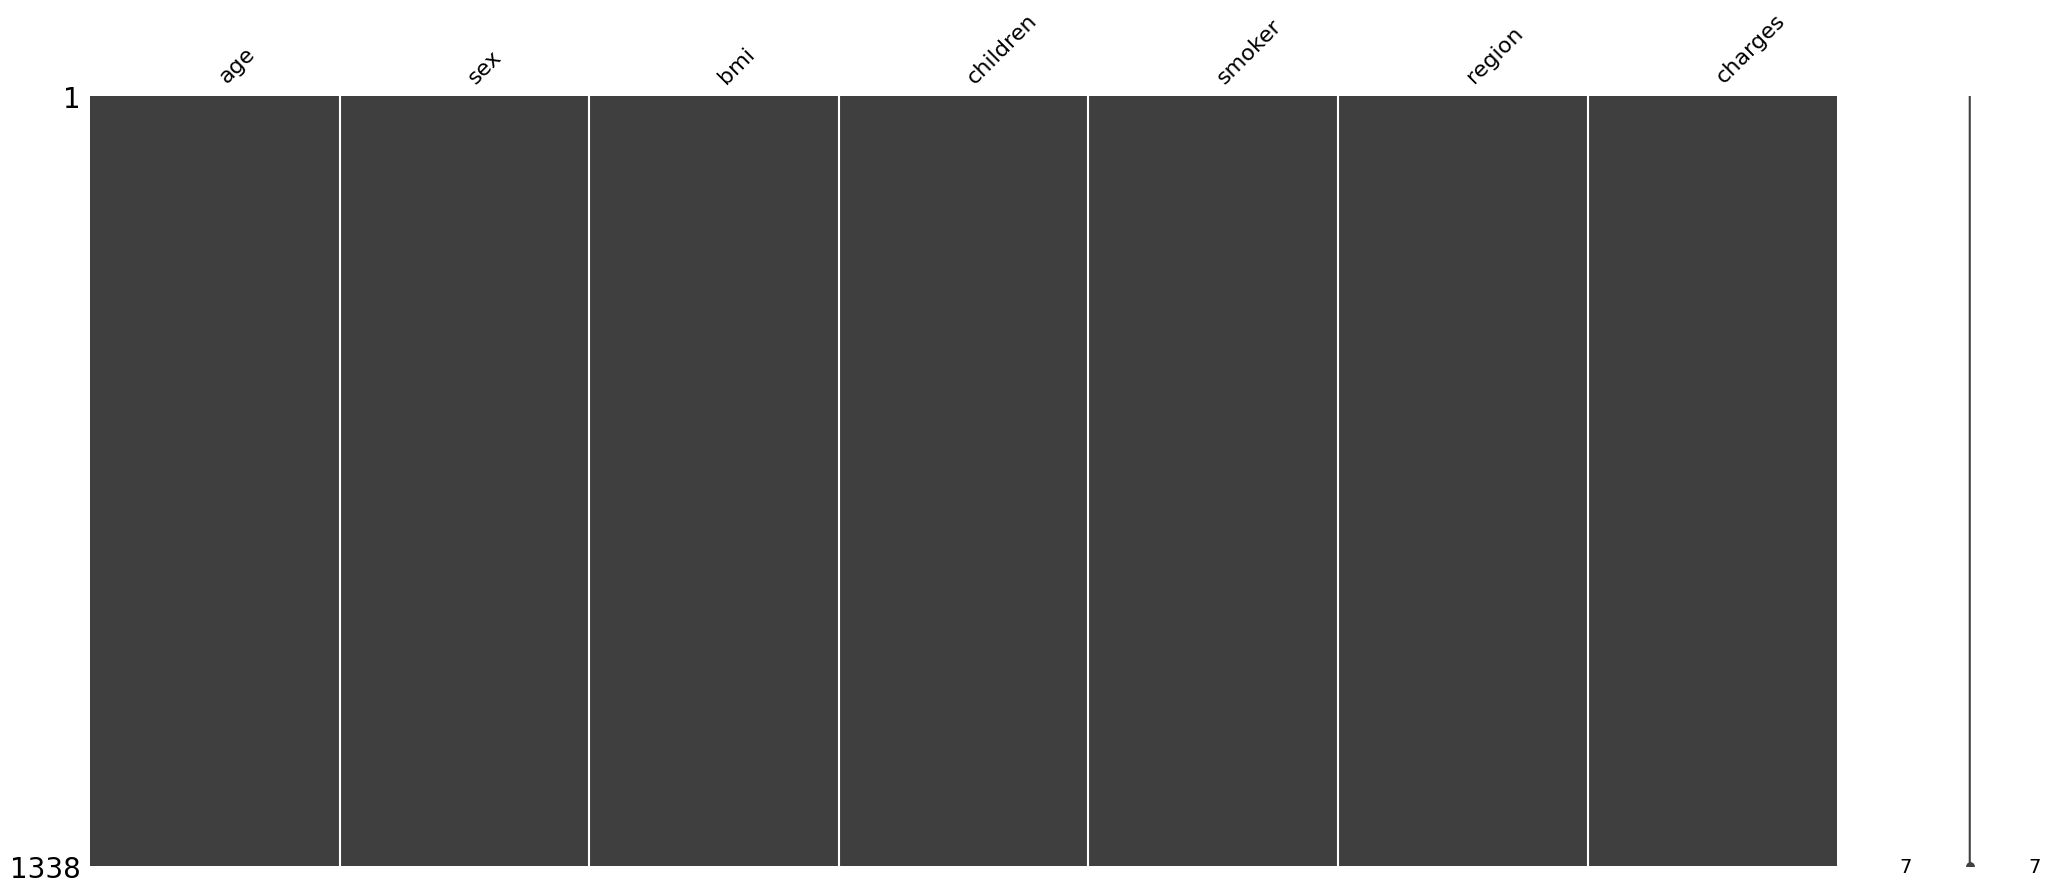

In [89]:
import missingno as msno

# Visualize missing data as a matrix plot
plt.figure(figsize=(10, 6))
msno.matrix(df)
plt.show()

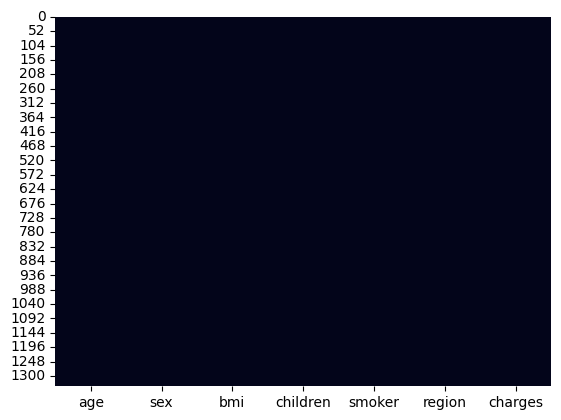

In [90]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [91]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Train and Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define input (X) and output (y)
X = df.drop(columns=['charges'])  # Features (all except target)
y = df['charges']  # Target variable

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shape to confirm split
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1070, 6)
Testing set shape: (268, 6)


### Model Training

In [99]:
from sklearn.linear_model import LinearRegression
# call the linear regression model
regressor = LinearRegression()

# fit the model
regressor.fit(X_train, Y_train)

LinearRegression()

In [100]:
from sklearn import metrics
import numpy as np
# prediction on training data
training_data_prediction = regressor.predict(X_train)
r2_train = metrics.r2_score(Y_train, training_data_prediction)
mse_train = metrics.mean_squared_error(Y_train, training_data_prediction)
mae_train = metrics.mean_absolute_error(Y_train, training_data_prediction)
rmse_train = np.sqrt(mse_train)

heading('Training Metrics')
print("R squared value on training data: ", r2_train)
print("Mean squared error on training data: ", mse_train)
print("Mean absolute error on training data: ", mae_train)
print("Root mean squared error on training data: ", rmse_train)



TRAINING METRICS
R squared value on training data:  0.7417049283233981
Mean squared error on training data:  37280663.22256598
Mean absolute error on training data:  4208.762029186571
Root mean squared error on training data:  6105.789320191615


In [101]:
# prediction on testing data
testing_data_prediction = regressor.predict(X_test)
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
mse_test = metrics.mean_squared_error(Y_test, testing_data_prediction)
mae_test = metrics.mean_absolute_error(Y_test, testing_data_prediction)
rmse_test = np.sqrt(mse_test)

heading('Testing Metrics')
print("R squared value on testing data: ", r2_test)
print("Mean squared error on testing data: ", mse_test)
print("Mean absolute error on testing data: ", mae_test)
print("Root mean squared error on testing data: ", rmse_test)

TESTING METRICS
R squared value on testing data:  0.7833463107364539
Mean squared error on testing data:  33635210.431178406
Mean absolute error on testing data:  4186.508898366432
Root mean squared error on testing data:  5799.587091438356


**For regression, common evaluation metrics include:**

**Mean Absolute Error (MAE)** → Measures absolute difference between actual and predicted values.

**Mean Squared Error (MSE)** → Penalizes larger errors more.

**Root Mean Squared Error (RMSE)** → Similar to MSE but in the same unit as the target variable.

**R² Score (Coefficient of Determination)** → Shows how much variance in charges is explained by features.

**Interpret Results**

If `RMSE` is low, predictions are close to actual values.

If `R²` is near 1, the model explains most of the variance in charges.

If performance on training & testing is similar, the model generalizes well.

### Prediction on New Data

In [102]:
# building a predictive system
# input_data = (31, 0, 25.74, 0, 0, 2)
input_data = (62, 0, 26.29, 0, 1, 2)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print("The insurance cost is USD: ", prediction[0])

The insurance cost is USD:  35923.826740996665


### Cross Validation

In [107]:
from sklearn.model_selection import cross_val_score, KFold
# Implement k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(regressor, X, y, cv=kf, scoring="r2")

# Print results
print(f"Cross-validation R² scores: {cv_scores}")
print(f"Mean R² score: {np.mean(cv_scores)}")

Cross-validation R² scores: [0.78334631 0.74026709 0.79566892 0.63244564 0.75199803]
Mean R² score: 0.7407451971654287
